In [1]:
   from google.colab import drive

   drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

X_twocand = np.loadtxt("/content/drive/MyDrive/CS229/bert_twocand_data.csv", delimiter=",")
sent_twocand = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_twocand_data.csv", delimiter=",")
sent_twocand = np.reshape(sent_twocand, (-1, 1))
y_twocand = np.loadtxt("/content/drive/MyDrive/CS229/bert_twocand_label.csv", delimiter=",")

y_twocand = np.reshape(y_twocand, (-1, 1))

X_twocand = np.concatenate([X_twocand, sent_twocand, y_twocand], axis=1)


X_multcand = np.loadtxt("/content/drive/MyDrive/CS229/bert_multcand_data.csv", delimiter=",")
sent_multcand = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_multcand_data.csv", delimiter=",")
sent_multcand = np.reshape(sent_multcand, (-1, 1))
y_multcand = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_multcand_label.csv", delimiter=",")

print(y_multcand.mean())
assert False

y_multcand = np.reshape(y_multcand, (-1, 1))

X_twocand = np.concatenate([X_twocand, sent_twocand, y_twocand], axis=1)

X1 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era1_data.csv", delimiter=",")
sent1 = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era1_data.csv", delimiter=",")
sent1 = np.reshape(sent1, (-1, 1))
y1 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era1_label.csv", delimiter=",")

y1 = np.reshape(y1, (-1, 1))

X1 = np.concatenate([X1, sent1, y1], axis=1)

X2 = np.loadtxt("/content/drive/MyDrive/CS229/bert_data.csv", delimiter=",")
sent2 = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era2_data.csv", delimiter=",")
sent2 = np.reshape(sent2, (-1, 1))
y2 = np.loadtxt("/content/drive/MyDrive/CS229/bert_label.csv", delimiter=",")

y2 = np.reshape(y2, (-1, 1))

X2 = np.concatenate([X2, sent2, y2], axis=1)

X3 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era3_data.csv", delimiter=",")
sent3 = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era3_data.csv", delimiter=",")
sent3 = np.reshape(sent3, (-1, 1))
y3 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era3_label.csv", delimiter=",")

y3 = np.reshape(y3, (-1, 1))

X3 = np.concatenate([X3, sent3, y3], axis=1)

all = np.concatenate([X1], axis=0)


np.random.shuffle(all)

y = all[:, -1]
y = np.reshape(y, (-1, 1))
X = all[:, :-1]

print(all.shape, X.shape, y.shape)

train_num = round(len(X) * 0.8)
valid_num = round(len(X) * 0.1)

train_data = X[0:train_num, :]
train_label = y[0:train_num, :]

valid_data = X[train_num:train_num + valid_num, :]
valid_label = y[train_num:train_num + valid_num, :]

test_data = X[train_num + valid_num:, :]
test_label = y[train_num + valid_num:, :]

print(train_data.shape, train_label.shape, valid_data.shape, valid_label.shape, test_data.shape, test_label.shape)


input_layer = layers.Input(shape=(train_data.shape[1],))
dense_layer_1 = layers.Dense(256, activation='relu')(input_layer)
dropout_1 = layers.Dropout(0.5)(dense_layer_1)
dense_layer_2 = layers.Dense(128, activation='relu')(dense_layer_1)
dense_layer_3 = layers.Dense(64, activation='relu')(dense_layer_2)
output_layer = layers.Dense(2, activation='softmax')(dense_layer_2)

fine_tuned_model = keras.Model(inputs=input_layer, outputs=output_layer)
fine_tuned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = fine_tuned_model.fit(train_data, train_label.ravel(), epochs=4, batch_size=32, validation_data=(test_data, test_label))



fine_tuned_model.evaluate(valid_data, valid_label)
predictions_new = fine_tuned_model.evaluate(test_data, test_label)

print(predictions_new)

0.16835016835016836


AssertionError: ignored

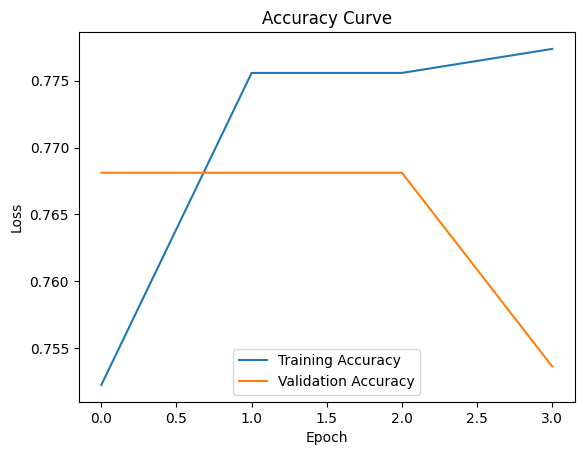

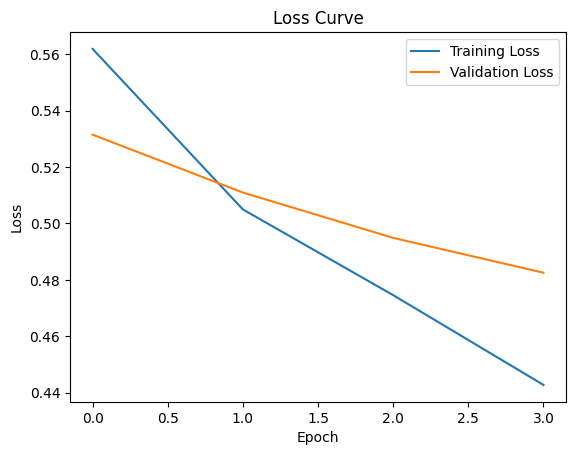

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

X1 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era1_data.csv", delimiter=",")
y1 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era1_label.csv", delimiter=",")

X2 = np.loadtxt("/content/drive/MyDrive/CS229/bert_data.csv", delimiter=",")
y2 = np.loadtxt("/content/drive/MyDrive/CS229/bert_label.csv", delimiter=",")

X3 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era3_data.csv", delimiter=",")
y3 = np.loadtxt("/content/drive/MyDrive/CS229/bert_era3_label.csv", delimiter=",")

y1 = np.reshape(y1, (-1, 1))
y2 = np.reshape(y2, (-1, 1))
y3 = np.reshape(y3, (-1, 1))

X = np.concatenate([X1, X2, X3], axis=0)
y = np.concatenate([y1, y2, y3], axis=0)

X = np.loadtxt("/content/drive/MyDrive/CS229/bert_twocand_data.csv", delimiter=",")
y = np.loadtxt("/content/drive/MyDrive/CS229/bert_twocand_label.csv", delimiter=",")

y = np.reshape(y, (-1, 1))

print(X.shape)
print(y.shape)


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
y_encoded = OrdinalEncoder().fit_transform(y)
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, stratify=y_encoded)

model = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))




(101, 768)
(101, 1)
Accuracy: 38.46%


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

K = 5

y = np.reshape(y, (-1, 1))

k_folds = KFold(n_splits = K)
logisticRegr = LogisticRegression()
scores = cross_val_score(logisticRegr, X, y, cv = k_folds)
print(scores)
print(scores.mean())

[0.57142857 0.5        0.4        0.35       0.4       ]
0.4442857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

bert_features = np.loadtxt("/content/drive/MyDrive/CS229/bert_data.csv", delimiter=",")
sentiment_features = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era2_data.csv", delimiter=",").reshape(-1, 1)

print(bert_features.shape)
print(sentiment_features.shape)

combined_features = np.concatenate([bert_features, sentiment_features], axis=1)
print(combined_features.shape)

input_layer = layers.Input(shape=(combined_features.shape[1],))
dense_layer_1 = layers.Dense(256, activation='relu')(input_layer)
dense_layer_2 = layers.Dense(128, activation='relu')(dense_layer_1)
dense_layer_3 = layers.Dense(64, activation='relu')(dense_layer_2)
output_layer = layers.Dense(2, activation='softmax')(dense_layer_3)

fine_tuned_model = keras.Model(inputs=input_layer, outputs=output_layer)
fine_tuned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

labels = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era2_label.csv", delimiter=",").reshape(-1, 1)
fine_tuned_model.fit(combined_features, labels, epochs=10, batch_size=32)

bert_features_new = np.loadtxt("/content/drive/MyDrive/CS229/bert_era3_data.csv", delimiter=",")
sentiment_features_new = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era3_data.csv", delimiter=",").reshape(-1, 1)


combined_features_new = np.concatenate([bert_features_new, sentiment_features_new], axis=1)
test_labels = np.loadtxt("/content/drive/MyDrive/CS229/sentiment_era3_label.csv", delimiter=",").reshape(-1, 1)
predictions_new = fine_tuned_model.evaluate(combined_features_new, test_labels)

print(predictions_new)


(240, 768)
(240, 1)
(240, 769)
Epoch 1/10
8/8 [==============================] - 6s 7ms/step - loss: 0.6208 - accuracy: 0.7542
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.8000
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4925 - accuracy: 0.8000
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8000
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4434 - accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8000
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3929 - accuracy: 0.8000
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3536 - accuracy: 0.8083
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8500
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7661
[0.534